# Alzhippo Pr0gress

##### Possible Tasks
- **Visualizing fibers** passing through ERC and hippo, for both ipsi and contra cxns (4-figs) (GK)
- **Dilate hippocampal parcellations**, to cover entire hippocampus by nearest neighbour (JV)
- **Voxelwise ERC-to-hippocampal** projections + clustering (Both)

## Visulaizating fibers

1. Plot group average connectome
2. Find representative subject X (i.e. passes visual inspection match to the group)
3. Visualize fibers with parcellation
4. Repeat 3. on dilated parcellation
5. If connections appear more symmetric in 4., regenerate graphs with dilated parcellation

### 1. Plot group average connectome

In [1]:
import numpy as np
import networkx as nx
import nibabel as nib
import scipy.stats as stats
import matplotlib.pyplot as plt
from nilearn import plotting
import os
import seaborn as sns
import pandas

%matplotlib notebook

In [2]:
def matrixplotter(data, log=True, title="Connectivity between ERC and Hippocampus"):
    plotdat = np.log(data + 1) if log else data
    plt.imshow(plotdat)
    labs = ['ERC-L', 'Hippo-L-noise', 'Hippo-L-tau',
            'ERC-R', 'Hippo-R-noise', 'Hippo-R-tau']
    plt.xticks(np.arange(0, 6), labs, rotation=40)
    plt.yticks(np.arange(0, 6), labs)
    plt.title(title)
    plt.colorbar()
    plt.show()    

<IPython.core.display.Javascript object>


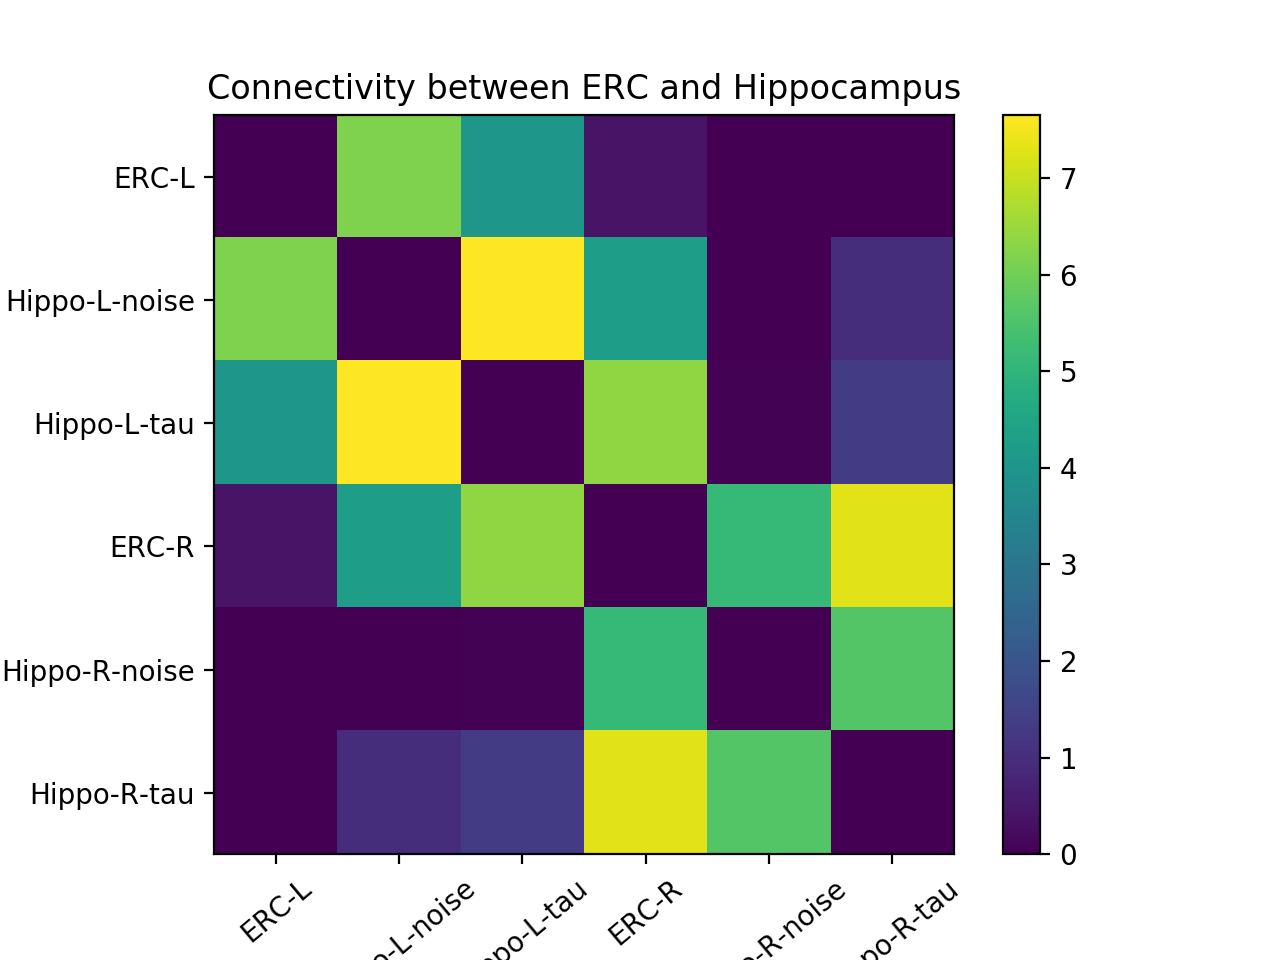

In [3]:
avg = np.load('../data/connection_matrix.npy')
matrixplotter(np.mean(avg, axis=2))

### 2. Find representative subject

In [4]:
tmp = np.reshape(avg.T, (355, 36))
tmp[0]
corrs = np.corrcoef(tmp)[-1]
corrs[corrs == 1] = 0
bestfit = int(np.where(corrs == np.max(corrs))[0])
print("Most similar graph: {}".format(bestfit))

Most similar graph: 333


<IPython.core.display.Javascript object>


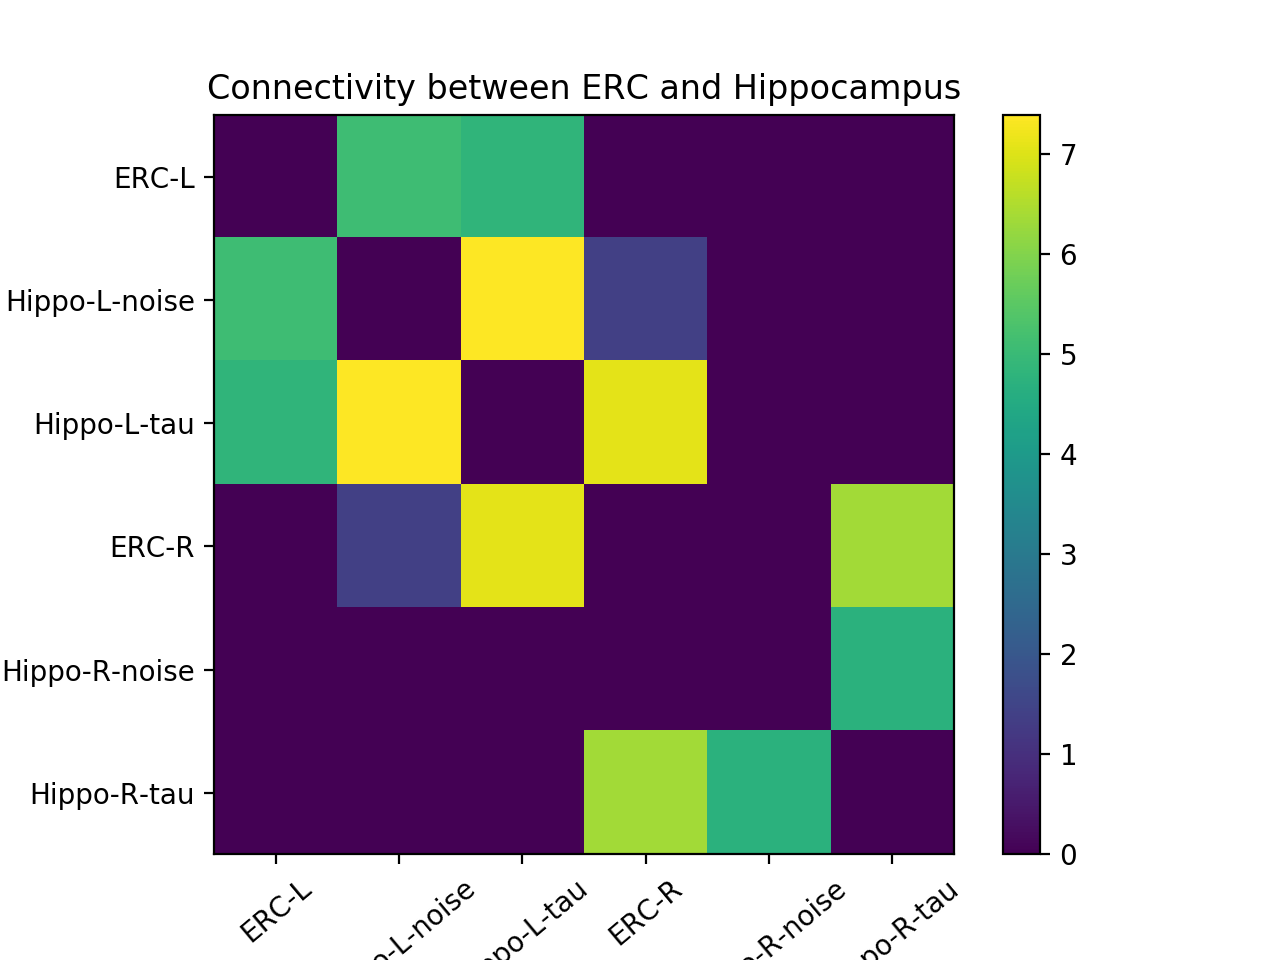

../data/graphs/HNU1/sub-0025444_ses-2_dwi_combined_erc_hippo_labels.wedgelist


In [5]:
dsets = ['../data/graphs/BNU1/combined_erc_hippo_labels/',
         '../data/graphs/BNU3/',
         '../data/graphs/HNU1/']
files = [os.path.join(d,f) for d in dsets for f in os.listdir(d)]
graph_fname = files[bestfit]
gx = nx.read_weighted_edgelist(graph_fname)
adjx = np.asarray(nx.adjacency_matrix(gx).todense())
matrixplotter(adjx)
print(graph_fname)

**N.B.**: The fibers from the subject/session shown above were SCP'd from the following location on Compute Canada's Cedar machine by @gkiar. They are too large for a git repository, but they were downloaded to the `data/fibers/` directory from the root of this project. Please @gkiar him if you'd like access to this file, in lieu of better public storage:

> /project/6008063/gkiar/ndmg/connectomics/ndmg-d/HNU1/fibers/sub-0025444_ses-2_dwi_fibers.npz

### 3. Visualize fibers with parcellation

Because I don't have VTK/Dipy locally, this was done in Docker with the script in `./code/npz2trackviz.py` and submitted to the scheduler with `./code/npzdriver.sh`.

The command to run this in Docker, from the base directory of this project was:

    docker run -ti \
               -v /Users/greg/code/gkiar/alzhippo/data/:/data \
               -v /Users/greg/code/gkiar/alzhippo/code/:/proj \
               --entrypoint python2.7 \
               bids/ndmg:v0.1.0 \
               /proj/npz2trackviz.py /data/fibers/sub-0025444_ses-2_dwi_fibers.npz /data/combined_erc_hippo_labels.nii.gz

The resulting `.trk` files were viewed locally with [TrackVis](http://www.trackvis.org/) to make the screenshot below.